In [6]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
sns.set()

In [7]:
df = pd.read_csv("diabetes.csv")

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/var/folders/b0/y0q5l7lx61g3k6f4zvy9__4h0000gn/T/ipykernel_19861/3580525524.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
/var/folders/b0/y0q5l7lx61g3k6f4zvy9__4h0000gn/T/ipykernel_19861/3580525524.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
/var/folders/b0/

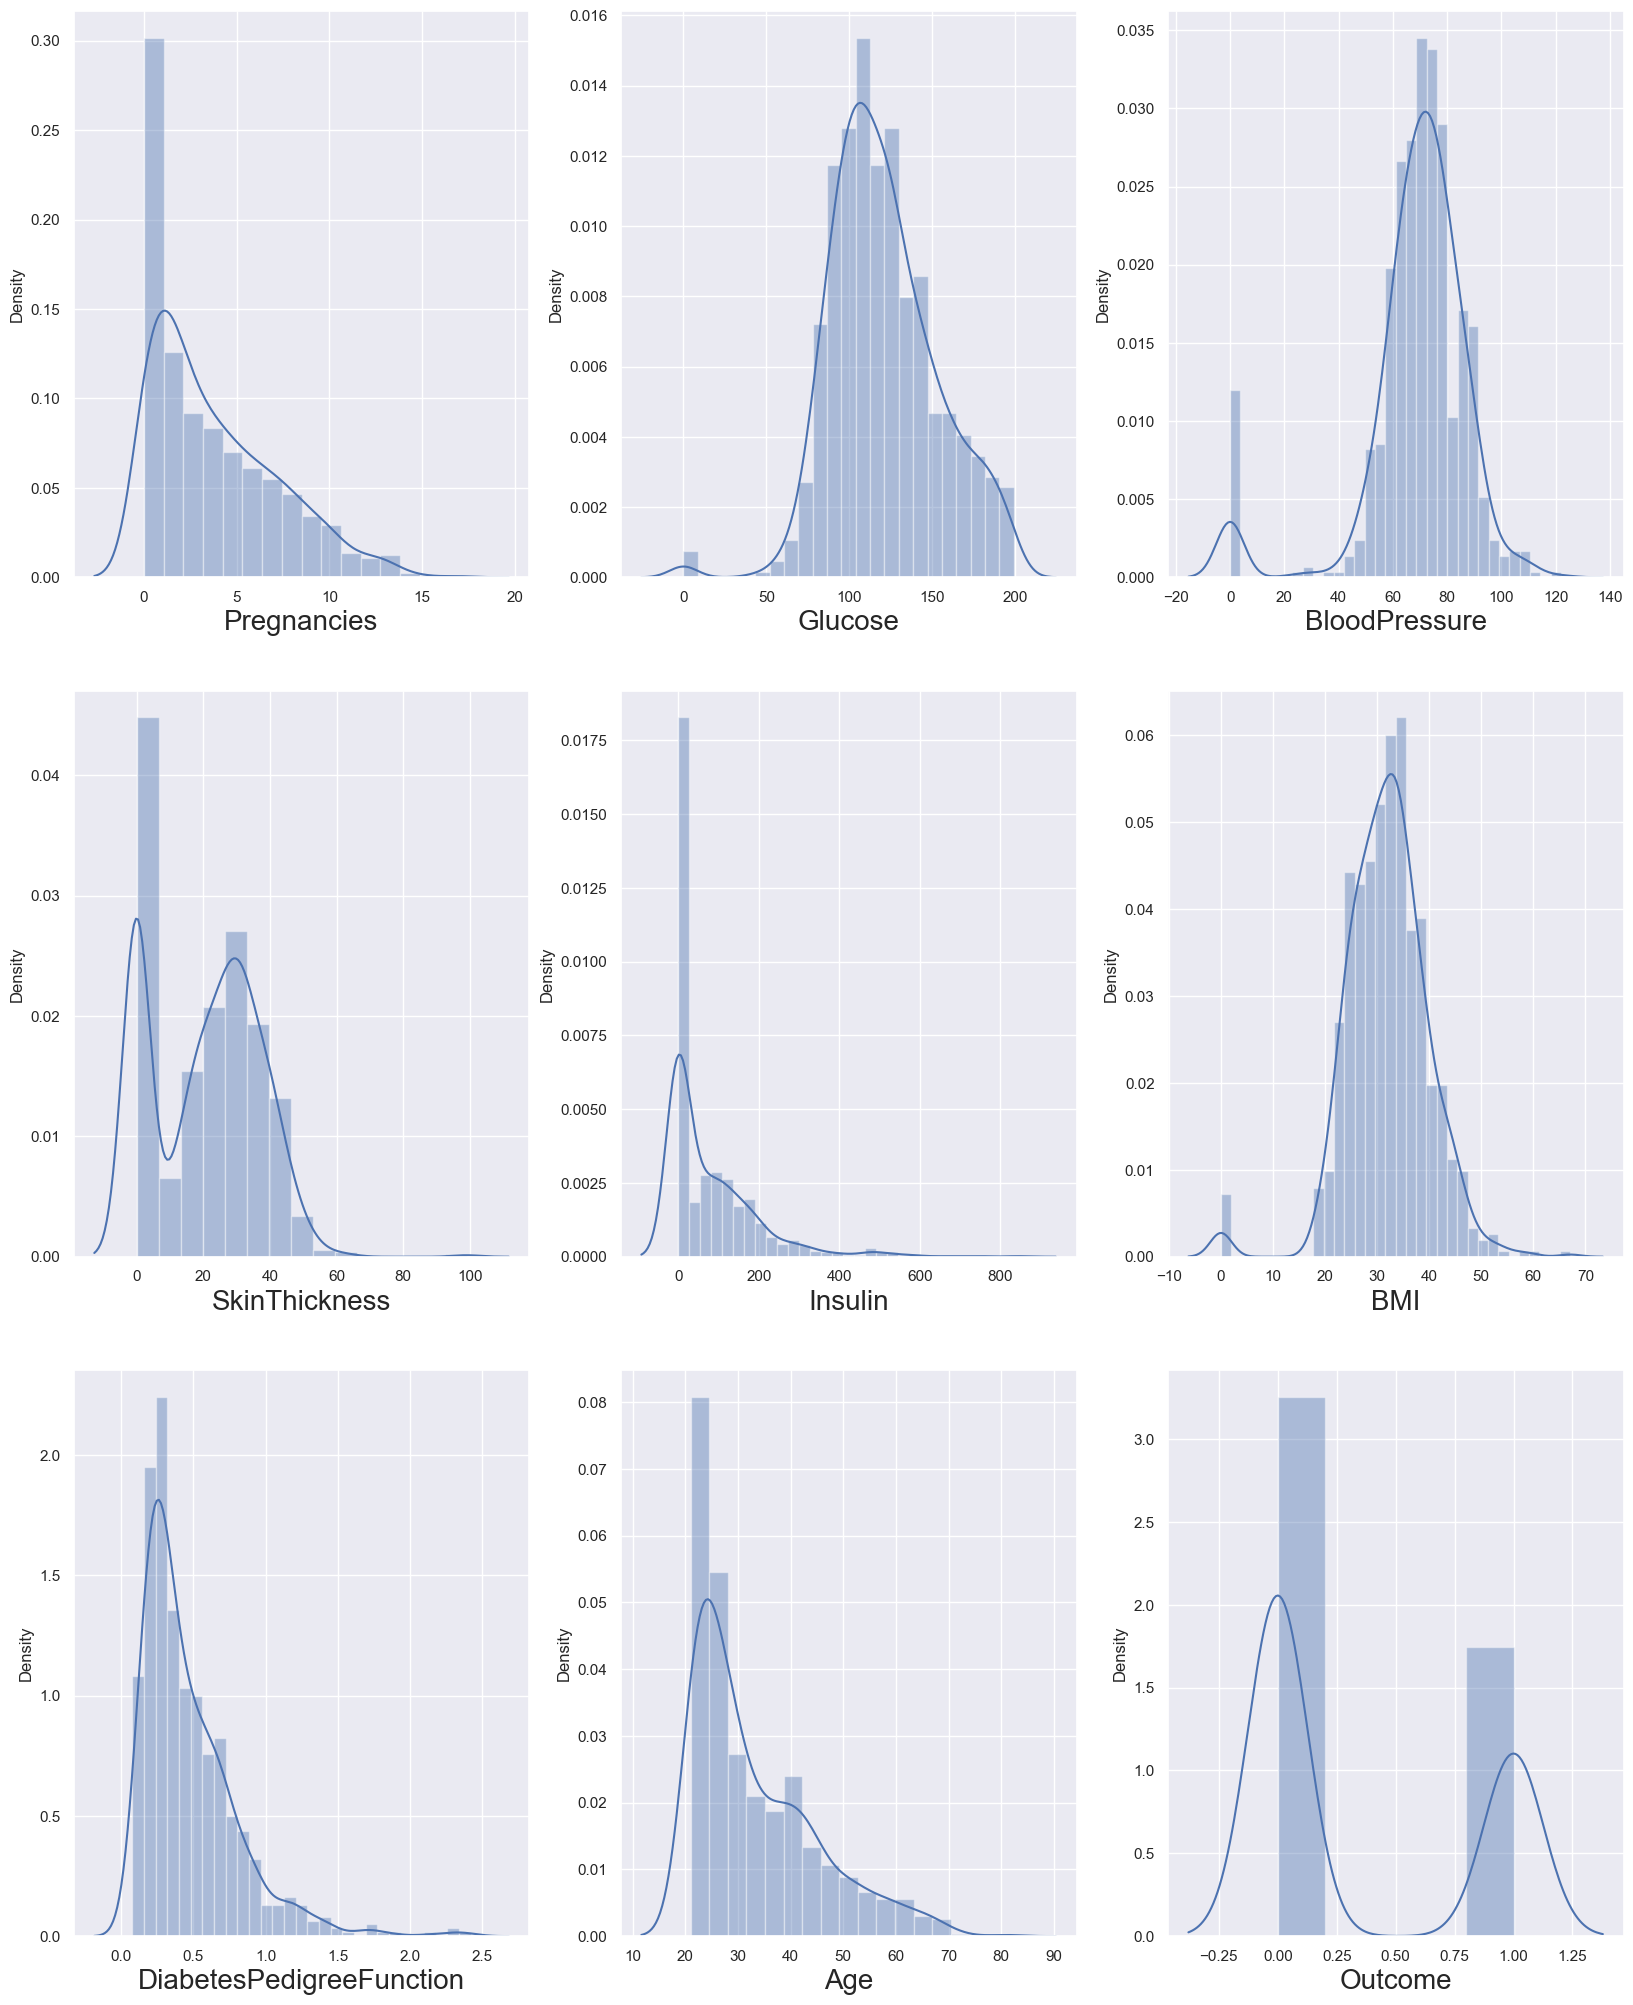

In [15]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in df:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [69]:
## replacing the 0 values with the mean of that column
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [21]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


/var/folders/b0/y0q5l7lx61g3k6f4zvy9__4h0000gn/T/ipykernel_19861/3580525524.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
/var/folders/b0/y0q5l7lx61g3k6f4zvy9__4h0000gn/T/ipykernel_19861/3580525524.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
/var/folders/b0/

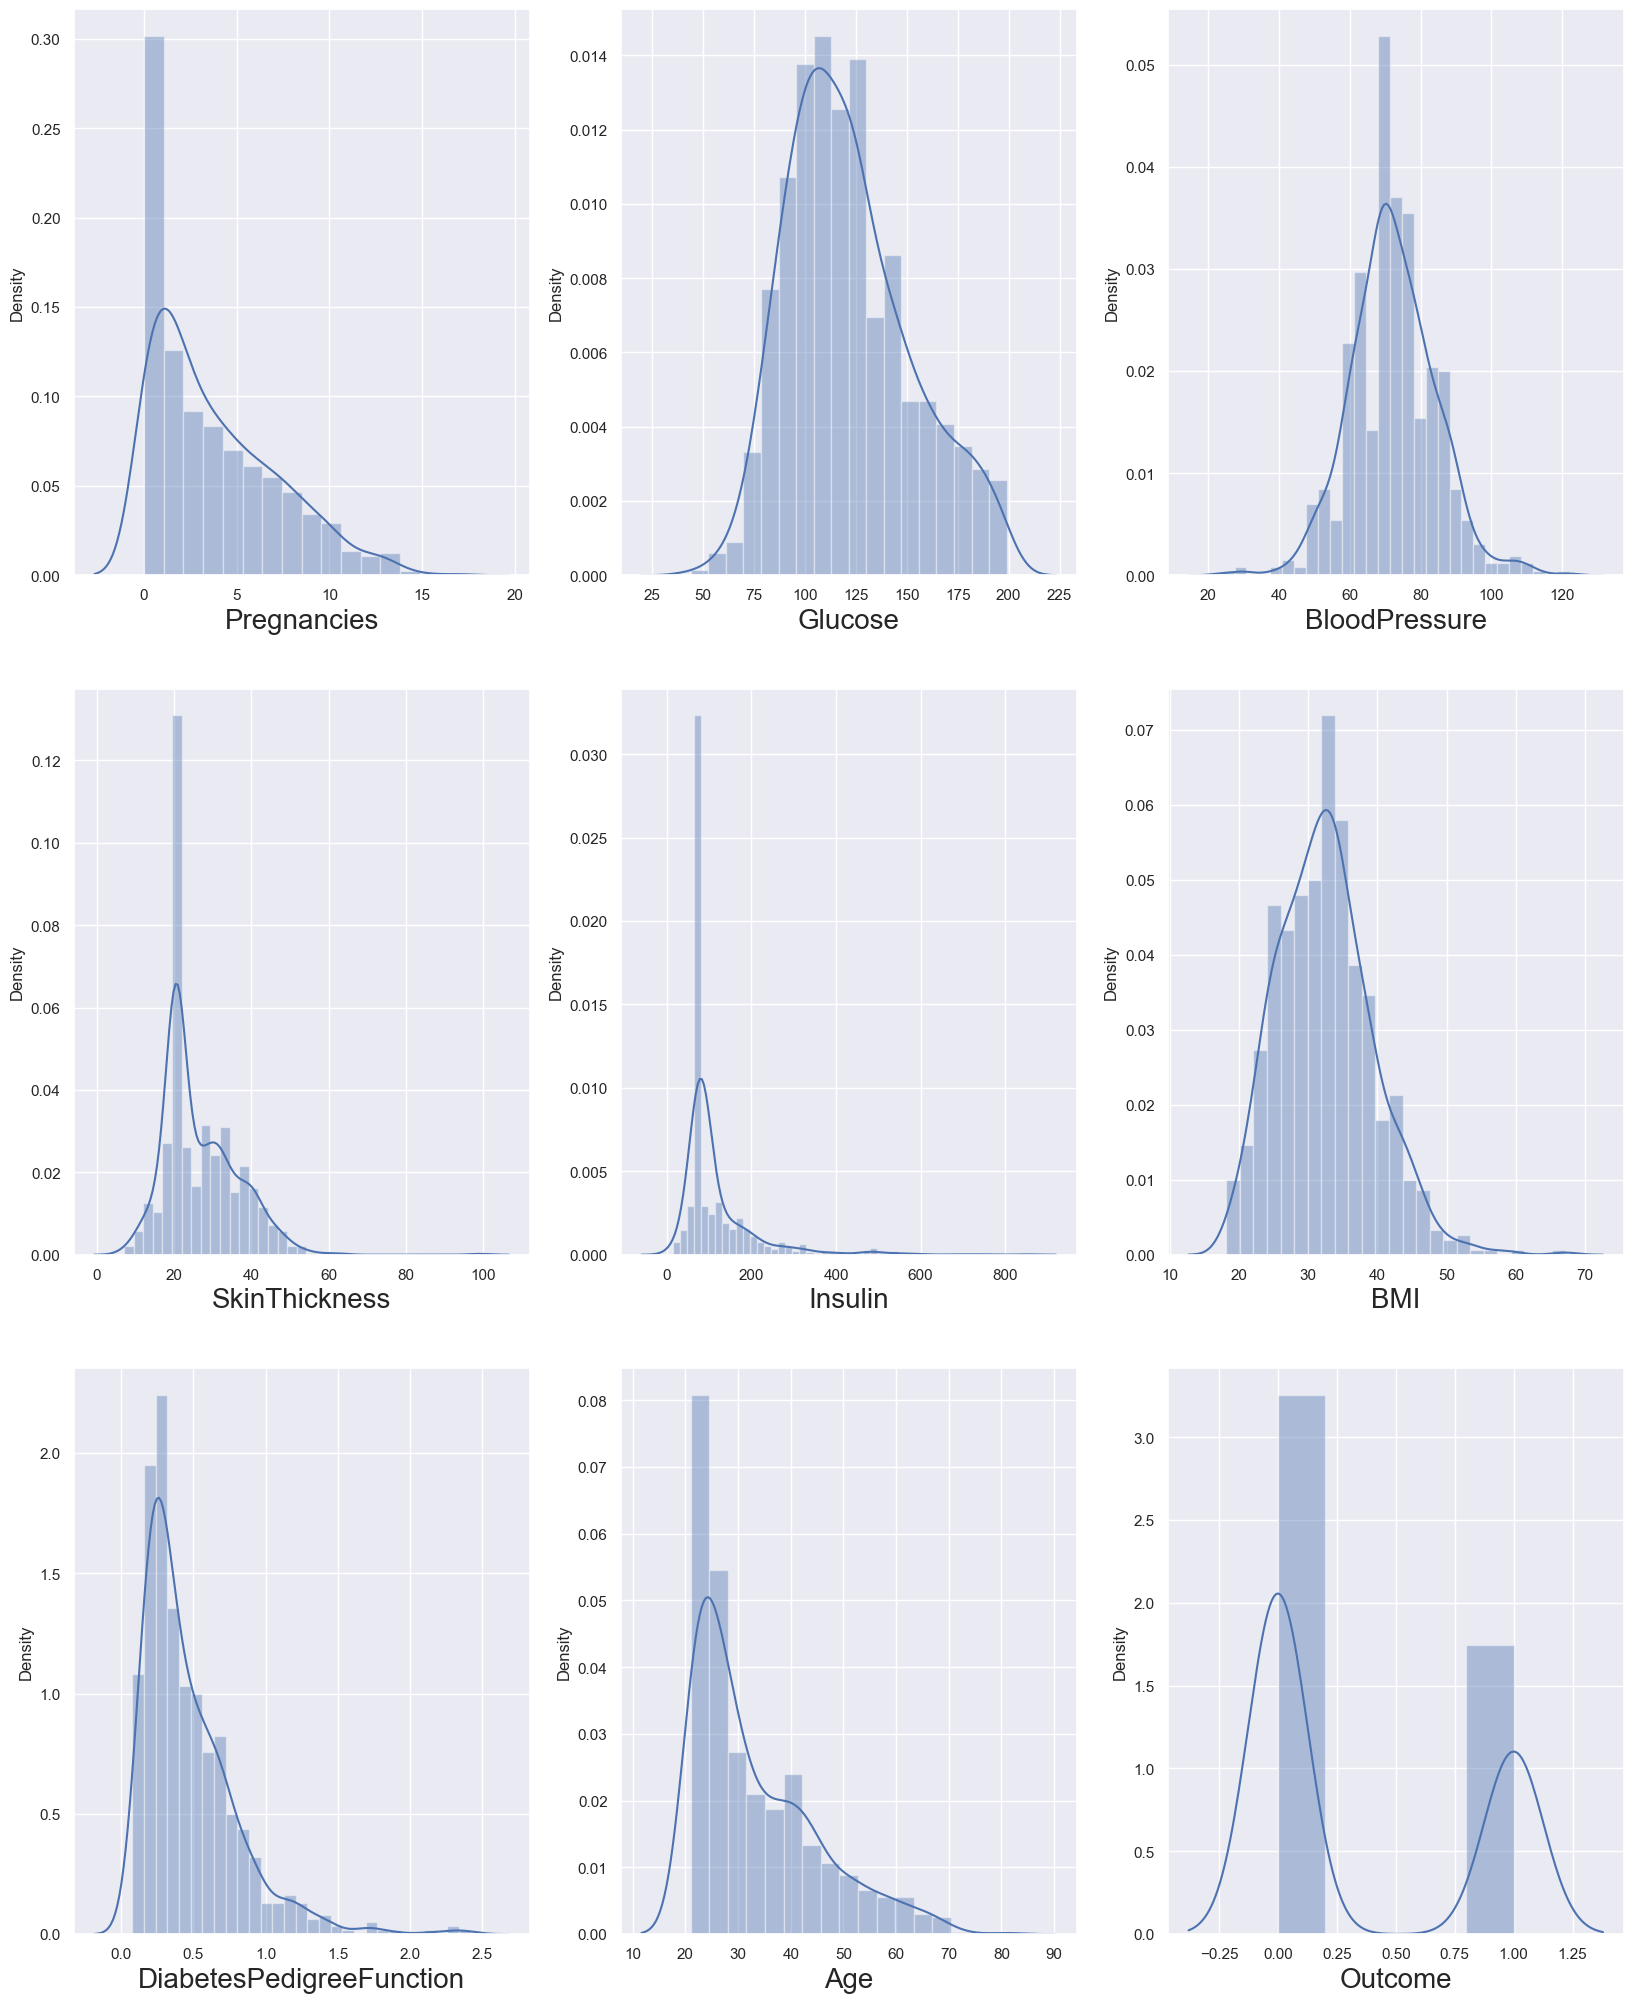

In [70]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in df:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

<Axes: >

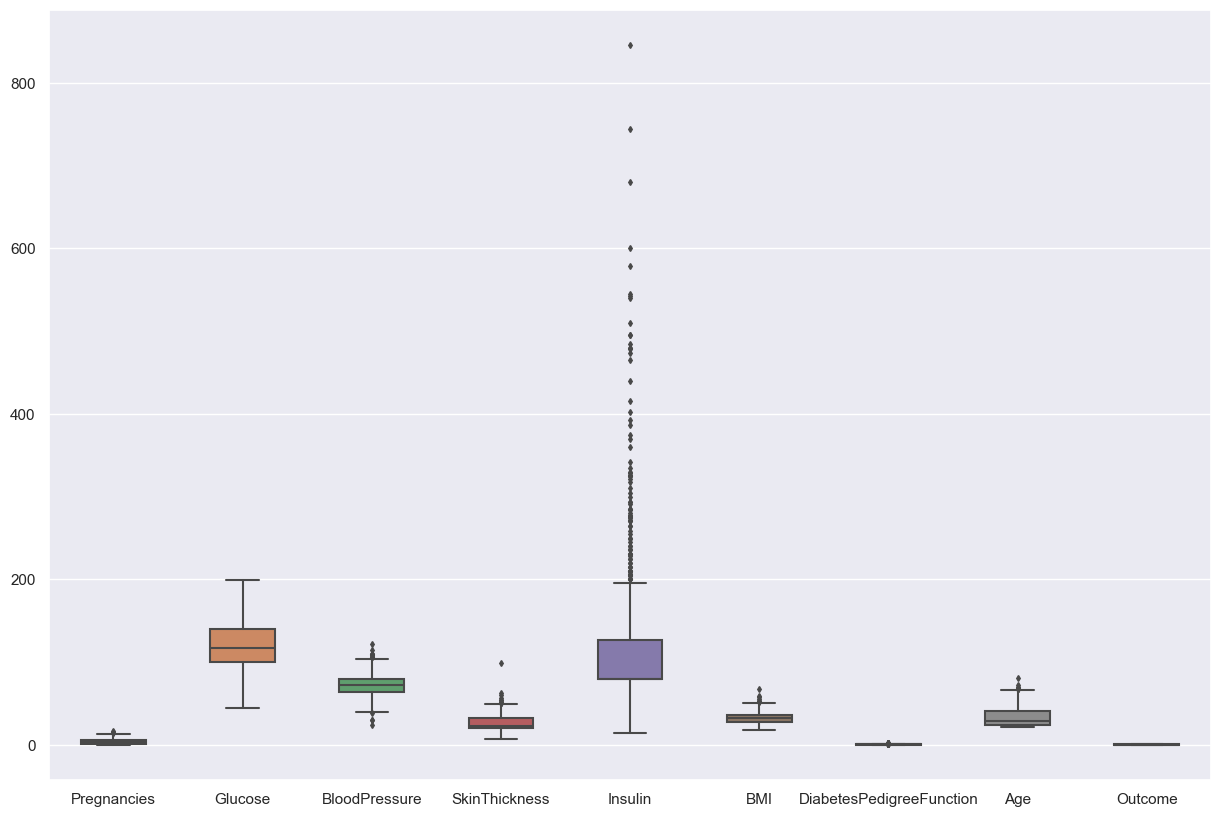

In [71]:
#boxplots for all the columns
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df,width=0.5,ax=ax,fliersize=3)

we can see that there are outliers for most of the columns hence we will remove the outliers

In [72]:
q = df['Pregnancies'].quantile(0.98)
data_cleaned = df[df['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['Insulin'].quantile(0.95)
data_cleaned = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['Age'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['Age']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
data_cleaned = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]

/var/folders/b0/y0q5l7lx61g3k6f4zvy9__4h0000gn/T/ipykernel_19861/2011722261.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[column])
/var/folders/b0/y0q5l7lx61g3k6f4zvy9__4h0000gn/T/ipykernel_19861/2011722261.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[colum

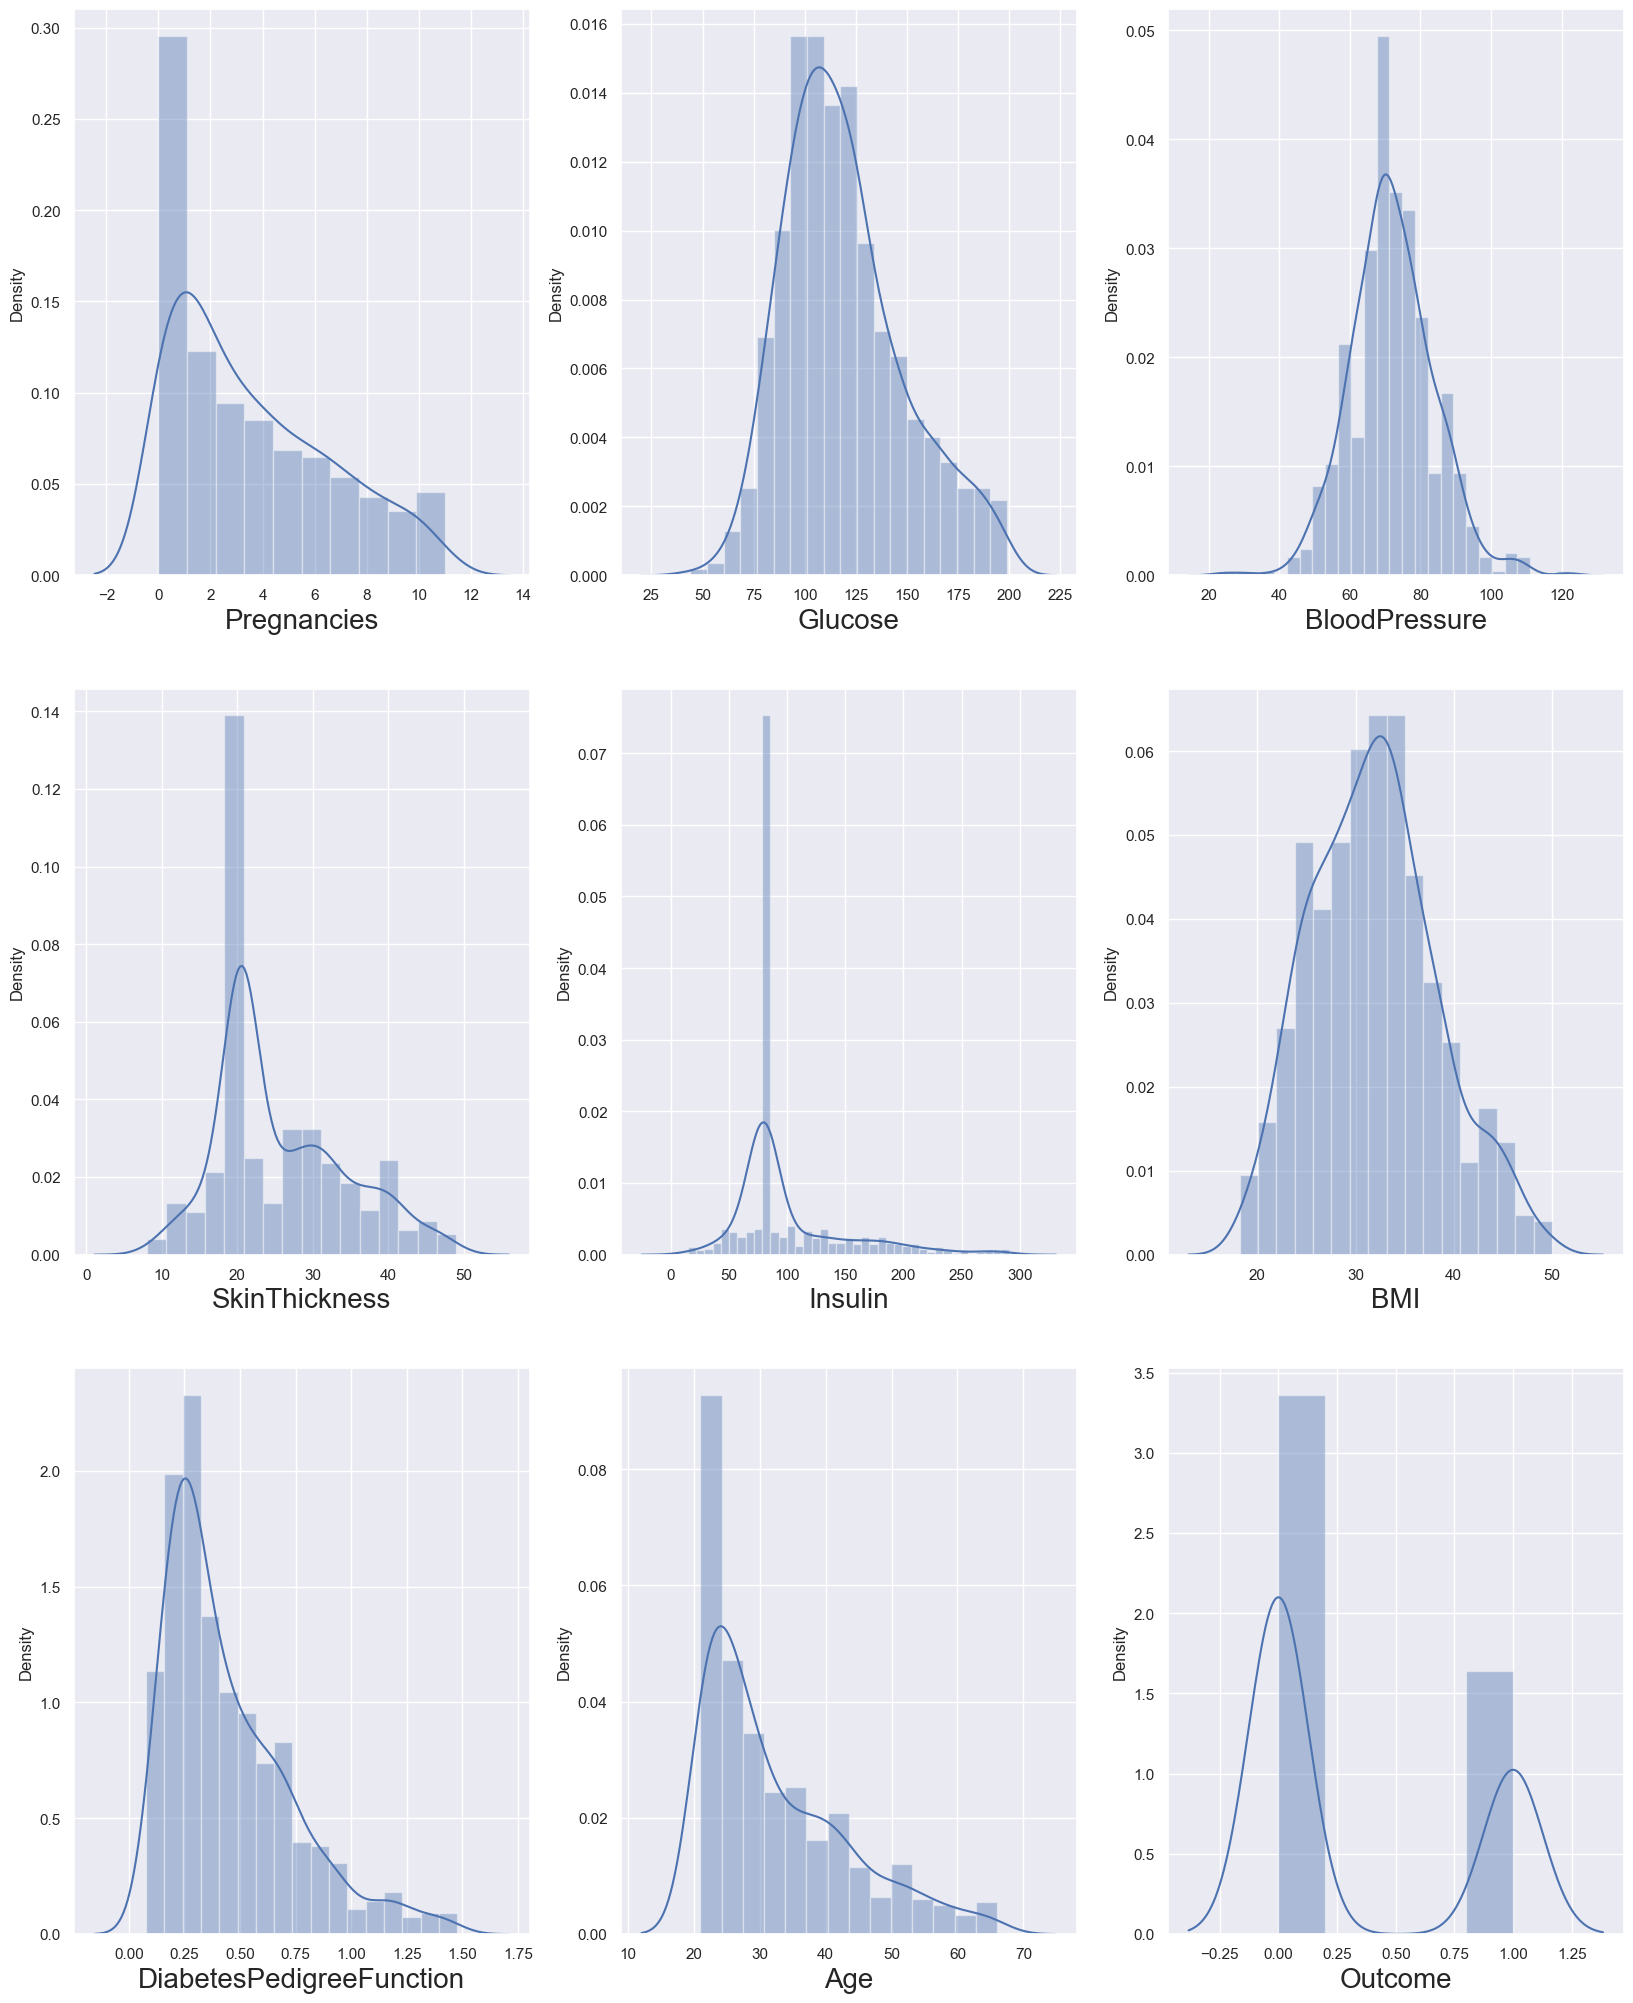

In [73]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in data_cleaned:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [74]:
X = data_cleaned.drop(columns = ['Outcome'])
y = data_cleaned['Outcome']

In [75]:
y.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

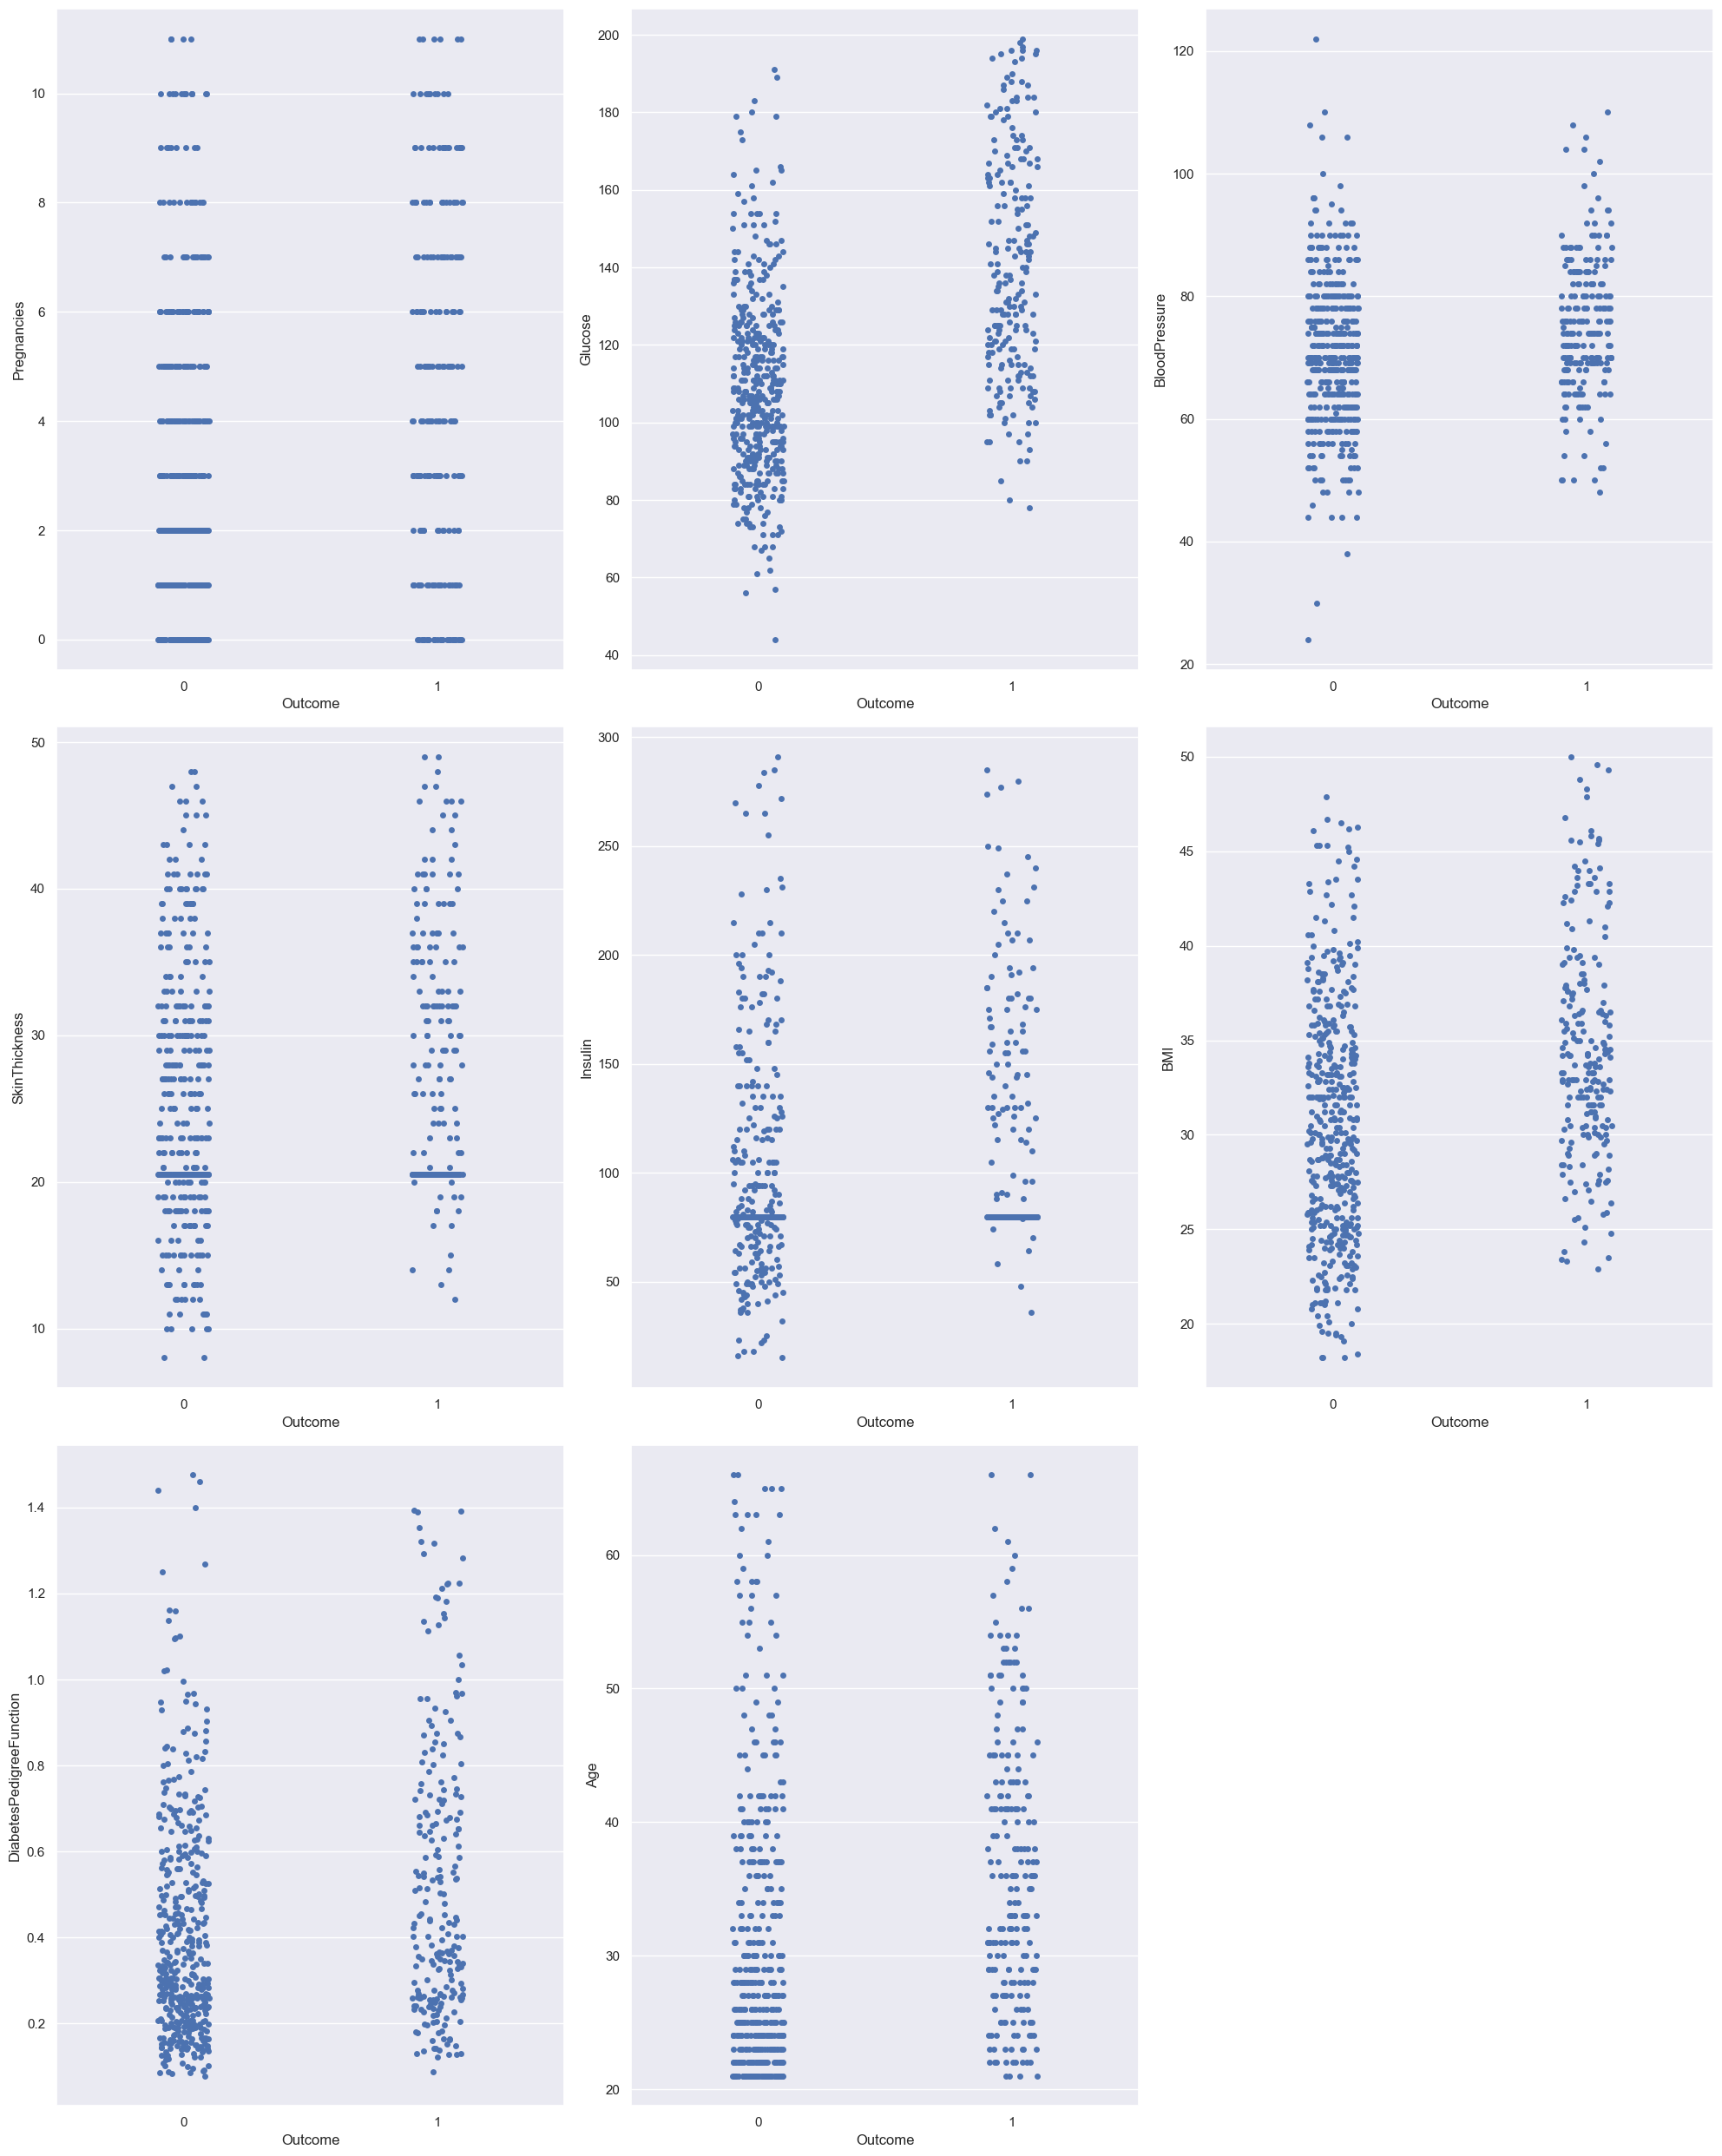

In [76]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in X.columns:
    if plotnumber <= 9:
        plt.subplot(3, 3, plotnumber)
        sns.stripplot(x=y, y=X[column])
        #plt.xlabel(column, fontsize=15)
        #plt.ylabel('Salary', fontsize=15)
    plotnumber += 1

plt.tight_layout()

In [77]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

Calculating the variance inflation factor

In [78]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns
vif

,vif,Features
0,1.449056,Pregnancies
1,1.304263,Glucose
2,1.262686,BloodPressure
3,1.470049,SkinThickness
4,1.271017,Insulin
5,1.513160,BMI
6,1.042300,DiabetesPedigreeFunction
7,1.662728,Age


In [79]:
X_scaled.shape

(674, 8)

In [80]:
y.shape

(674,)

In [81]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=355)

In [82]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [83]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

In [84]:
y_pred = log_reg.predict(x_test)

In [85]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.834319526627219

In [86]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[109,   8],
       [ 20,  32]])

In [87]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [88]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9316239316239316

In [89]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8449612403100775

In [90]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8861788617886178

In [91]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7735042735042735

In [92]:
fpr,tpr,thresholds = roc_curve(y_test, y_pred)

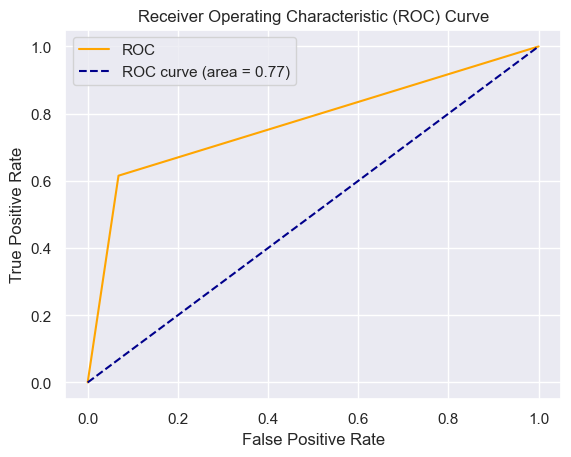

In [93]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [96]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [97]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30
